# 결정 트리

## 와인 분류하기
- 알코올도수, 당도, pH(산미)특성을 활용하여 와인의 종류(Red/White)를 분류해보자

In [1]:
# 데이터 준비
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine-date')

In [2]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [4]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


- 알코올 도수, 당도, pH값의 스케일이 다름
    - 당도는 범위가 넒다
- 표준화 필요해 보임

In [5]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [6]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [7]:
train_input.shape, test_input.shape

((5197, 3), (1300, 3))

In [8]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)


In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_input, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7602462959399654
0.7438461538461538


### 설명하기 쉬운 모델과 어려운 모델

In [10]:
print(lr.coef_, lr.intercept_)

[[ 0.42688448  0.35097153 -4.06374436]] [8.48811352]


- 이 모델은
- (알코올 도수 * 0.42688448 + 당도 * 0.35097153 +  pH * -4.06374436) + 8.48811352 의 값을 확률로 변환하고
    - 0.5보다 크면 화이트 와인
    - 작으면 레드 와인으로 분류
    - 정확도 76%
- 설명하기기 어렵다
    - 추측하면 알코올 도수와 당도가 높으면 화이트와인일 가능성이 높고
    - pH가 높을수록 레드와인일 가능성이 높은 것 같음
- 대부분의 머신러닝 모델은 설명하기가 어렵다
- 순서도를 그리듯이 설명할 수 있는 모델은??????

## 결정 트리
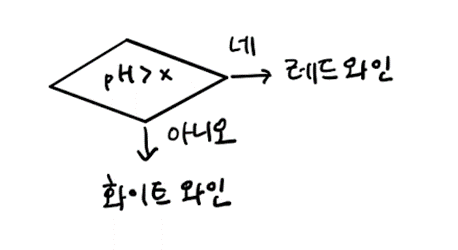
- 결정트리는 스무고개와 같음
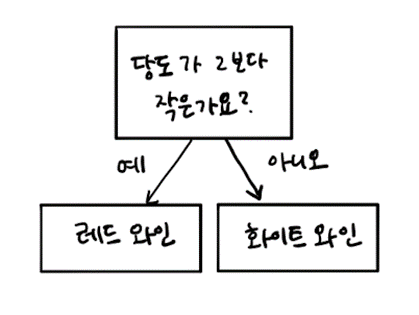
- 위와 같은 질문을 계속 추가해서 분류를 진행
    - 단, 데이터를 잘 나눌 수 있는 질문을 찾아야 함

In [30]:
from sklearn.tree import DecisionTreeClassifier



0.996921300750433
0.8584615384615385


In [12]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.996921300750433
0.8584615384615385


- 훈련 세트에 대한 점수가 굉장히 높은 반면 테스트 세트에 대한 점수는 낮음
    - 과대적합된 모델로 보임

- 그림으로 표현
    - sklearn의 plot_tree() 이용

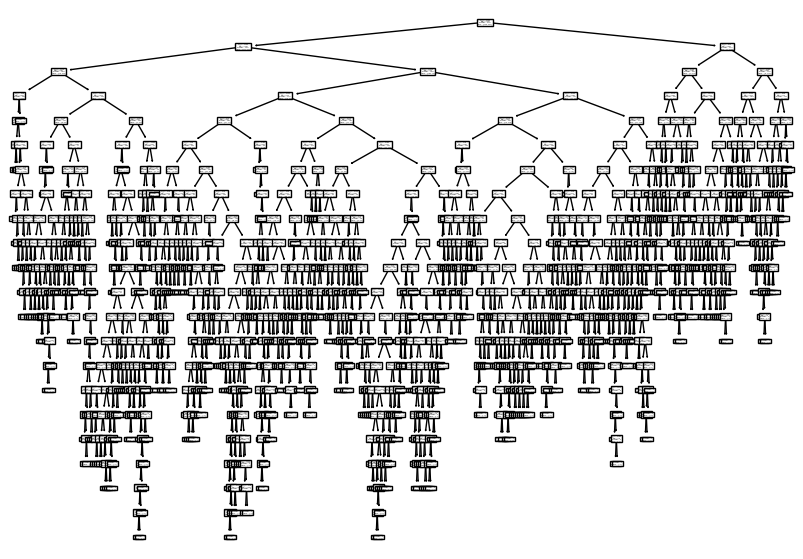

In [13]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

- 맨 위 사각형 : root node
- 맨 아래 사각형 : leaf node
- node
    - 결정트리를 구성하는 핵심 요소
        - 훈련 데이터 특성에 대한 테스트를 표현
        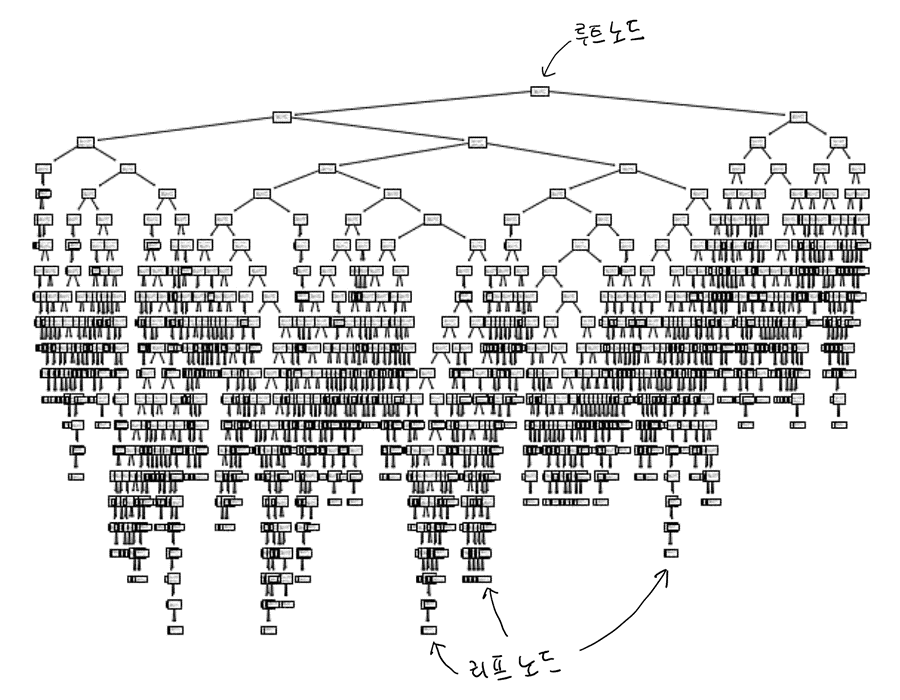

- 트리 깊이를 제한해서 출력
    - max_depth = 깊이단계
- filled=True 노드에 색상을 채워줌
    - 색상의 진하기가 높아지면, 노드는 불순도가 낮다(분류가 잘된 노드)
- feature_names= [피처명]
    - 노드의 설명이 피처명을 이용해 설명하게 됨

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

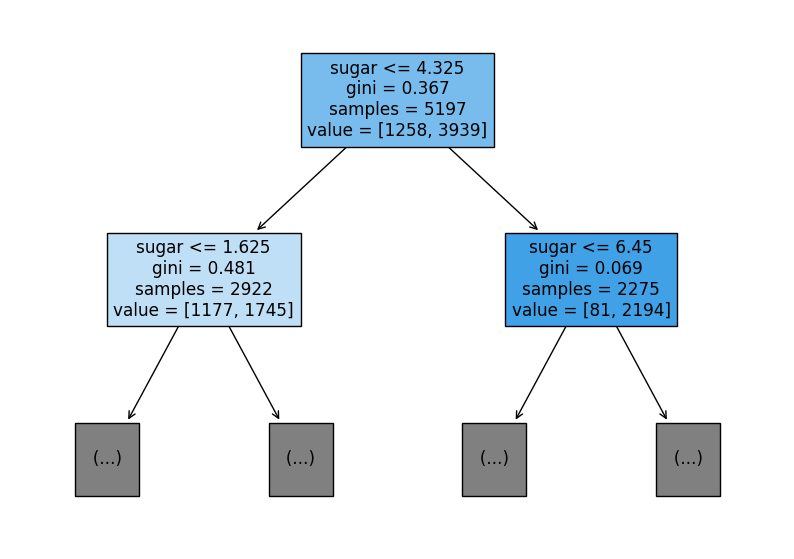

In [16]:
# filled=True 색상을 채워줌
# feature_names= [피처들] 조건 피처명을 표시해 줌
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

### 그림의 정보
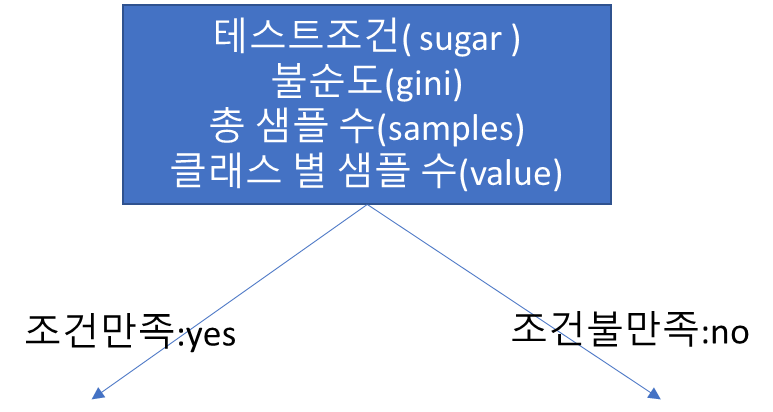

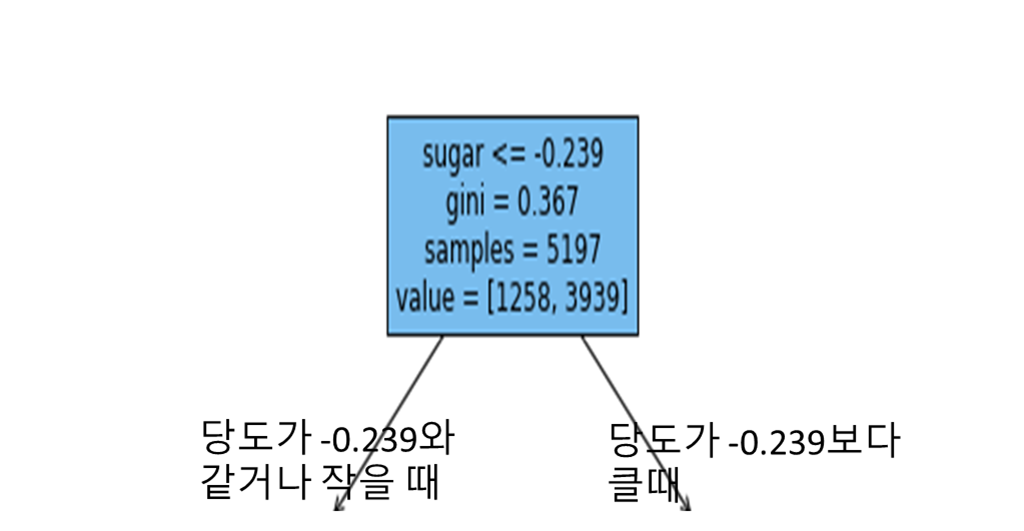

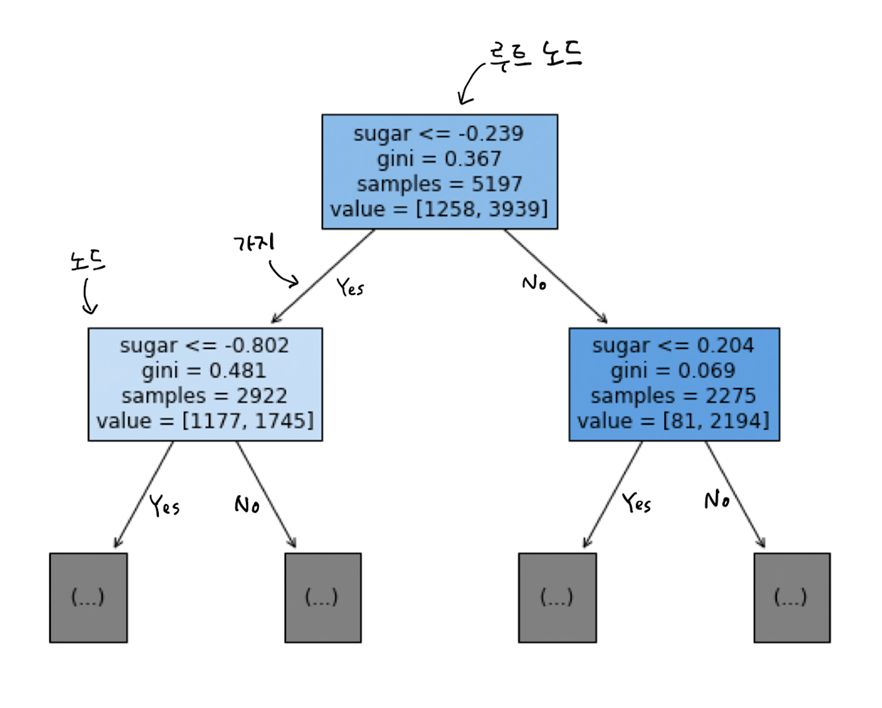

In [17]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [20]:
train_df = pd.DataFrame(data=train_input)
train_df.columns = ['alcohol','sugar','pH'] 
train_df['class'] = train_target

In [25]:
# root 노드 불순도
# 1-(음성클래스비율**2 + 양성클래스비율**2)
root = train_df[['class']]
pos = root.value_counts()[0]
neg = root.value_counts()[1]
tot = root.value_counts().sum()

pos_r = pos/tot
neg_r = neg/tot

gini = 1-(pos_r**2 + neg_r**2)
gini

0.3669367279393918

### 불순도
- gini : 지니 불순도(critertion 매개변수의 기본값)
- critertion 매개변수 : 데이터를 분할할 기준을 정하는 것
    - 루트도느가 sugar로 기준을 세운 이유???
        - 지니불순도를 활용한 계산
        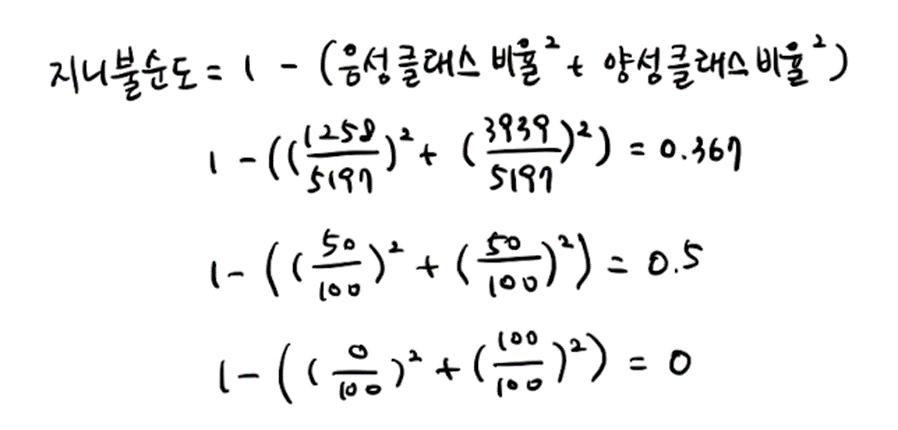
        - 지니 불순도는 두개의 클래스가 있을 때 결정값의 개수가 반반이면 0.5
            - 어느 한쪽의 클래스만 있으면 0 임
            - 즉, 클래스별 개수가 혼잡할 수록 불순도가 높아짐

- **결정트리 모델은 부모노드와 자식노드의 불순도 차이가 가능한 크도록 트리를 성장시킨다**
    - 부모노드와 자식노드의 불순도 차이 계산
    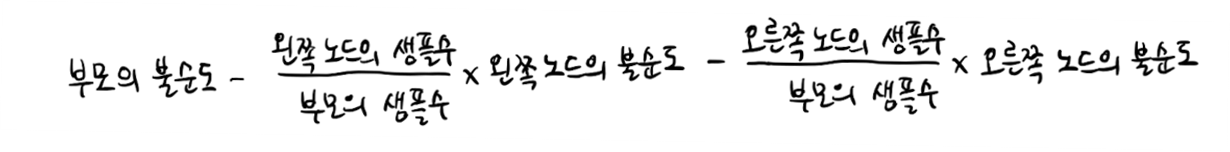
    - 위 노드를 예로 불순도를 계산해 보면
        - 0.367-(2922/5197) x 0.481 - (2275/5197) x 0.069 = 0.066
        - 0.066이 정보이득임(부모노드와 자식노드의 차이)
        - **결정트리 알고리즘은 정보이득이 최대가 되도록 데이터를 나눈다**
            - 기준은 지니 불순도

### 기상조건에 따른 테니스 경기 참가여부 데이터를 이용한 조건 생성 예제

In [27]:
tennis = pd.read_csv('./data/tennis.csv',encoding='cp949')
tennis.head()

,날짜,날씨,온도,습도,바람,참가여부
0,D1,맑음,더움,높음,약함,x
1,D2,맑음,더움,높음,강함,x
2,D3,흐림,더움,높음,약함,o
3,D4,비,포근,높음,약함,o
4,D5,비,서늘,정상,약함,o


In [29]:
# 타겟 데이터인 참가여부(root노드)의 지니 불순도 계산
pos = len(tennis[tennis['참가여부']=='o'])
neg = len(tennis[tennis['참가여부']=='x'])
tot = len(tennis['참가여부'])
print(pos,neg,tot)

# 지니불순도 계산
root_gini = 1-((pos/tot)**2 + (neg/tot)**2)
print(root_gini)

9 5 14
0.4591836734693877


In [30]:
# 날씨 노드의 지니 불순도 계산
tennis.groupby(['날씨','참가여부'])['날짜'].count()

날씨  참가여부
맑음  o       2
    x       3
비   o       3
    x       2
흐림  o       4
Name: 날짜, dtype: int64

In [35]:
weather_gini = 5/14*(1-((2/5)**2 + (3/5)**2)) + 5/14*(1-((3/5)**2 + (2/5)**2)) + 4/14*(1-(4/4)**2)
weather_gini

0.34285714285714286

In [36]:
# 온도 노드의 지니 불순도 계산
tennis.groupby(['온도','참가여부'])['날짜'].count()

온도  참가여부
더움  o       2
    x       2
서늘  o       3
    x       1
포근  o       4
    x       2
Name: 날짜, dtype: int64

In [37]:
temp_gini = 4/14*(1-((2/4)**2 + (2/4)**2)) + 4/14*(1-((3/4)**2 + (2/4)**2)) + 6/14*(1-((4/6)**2+(2/6)**2))
temp_gini 

0.38690476190476186

In [38]:
# 습도 노드의 지니 불순도 계산
tennis.groupby(['습도','참가여부'])['날짜'].count()

습도  참가여부
높음  o       3
    x       4
정상  o       6
    x       1
Name: 날짜, dtype: int64

In [39]:
hum_gini = 7/14*(1-((3/7)**2 + (4/7)**2)) + 7/14*(1-((6/7)**2 + (1/7)**2))
hum_gini 

0.3673469387755103

In [40]:
tennis.groupby(['바람','참가여부'])['날짜'].count()

바람  참가여부
강함  o       3
    x       3
약함  o       6
    x       2
Name: 날짜, dtype: int64

In [41]:
wind_gini = 6/14*(1-((3/6)**2 + (3/6)**2)) + 8/14*(1-((6/8)**2 + (2/8)**2))
wind_gini 

0.42857142857142855

In [42]:
 # 가장 정보이득이 큼(날씨로 가장 먼저 분류)
print(root_gini - weather_gini) # 가장 정보이득이 큼(날씨로 가장 먼저 분류)
print(root_gini - temp_gini)
print(root_gini - hum_gini)
print(root_gini - wind_gini)

0.11632653061224485
0.07227891156462585
0.09183673469387743
0.030612244897959162


### 가지치기
- 학습데이터에만 맞는 트리를 배제하고 일반화 시키기 위한 방법
    - 최대 깊이(max_depth=) 

In [44]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

# 깊이제한하지 않았을 떄 과대적합
# 0.996921300750433
# 0.8584615384615385

# depth를 3으로 제한했을 때 과소적합이 보임
# 0.8454877814123533
# 0.8415384615384616

0.8454877814123533
0.8415384615384616


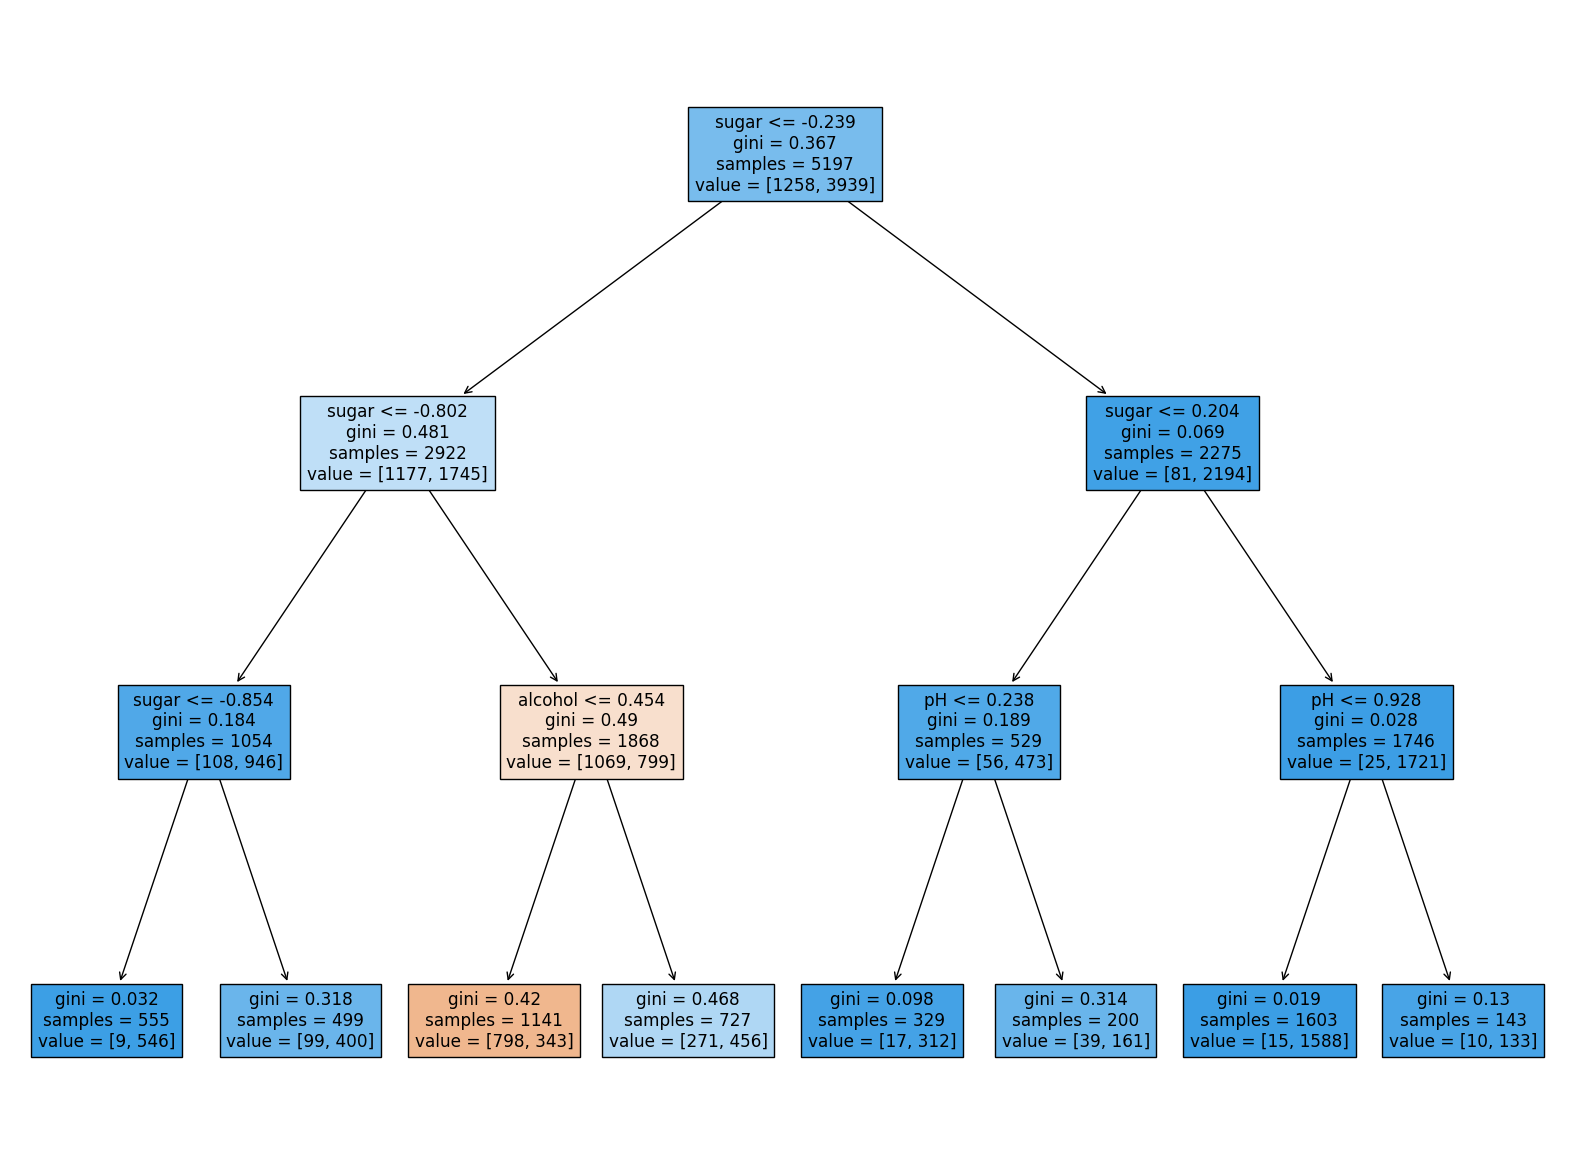

In [45]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

### 특성들간의 크기의 차이는 tree 알고리즘에는 영향을 미치지 않는다
- 스케일링 없이 바로 진행

In [ ]:
0.8454877814123533
0.8415384615384616

In [47]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


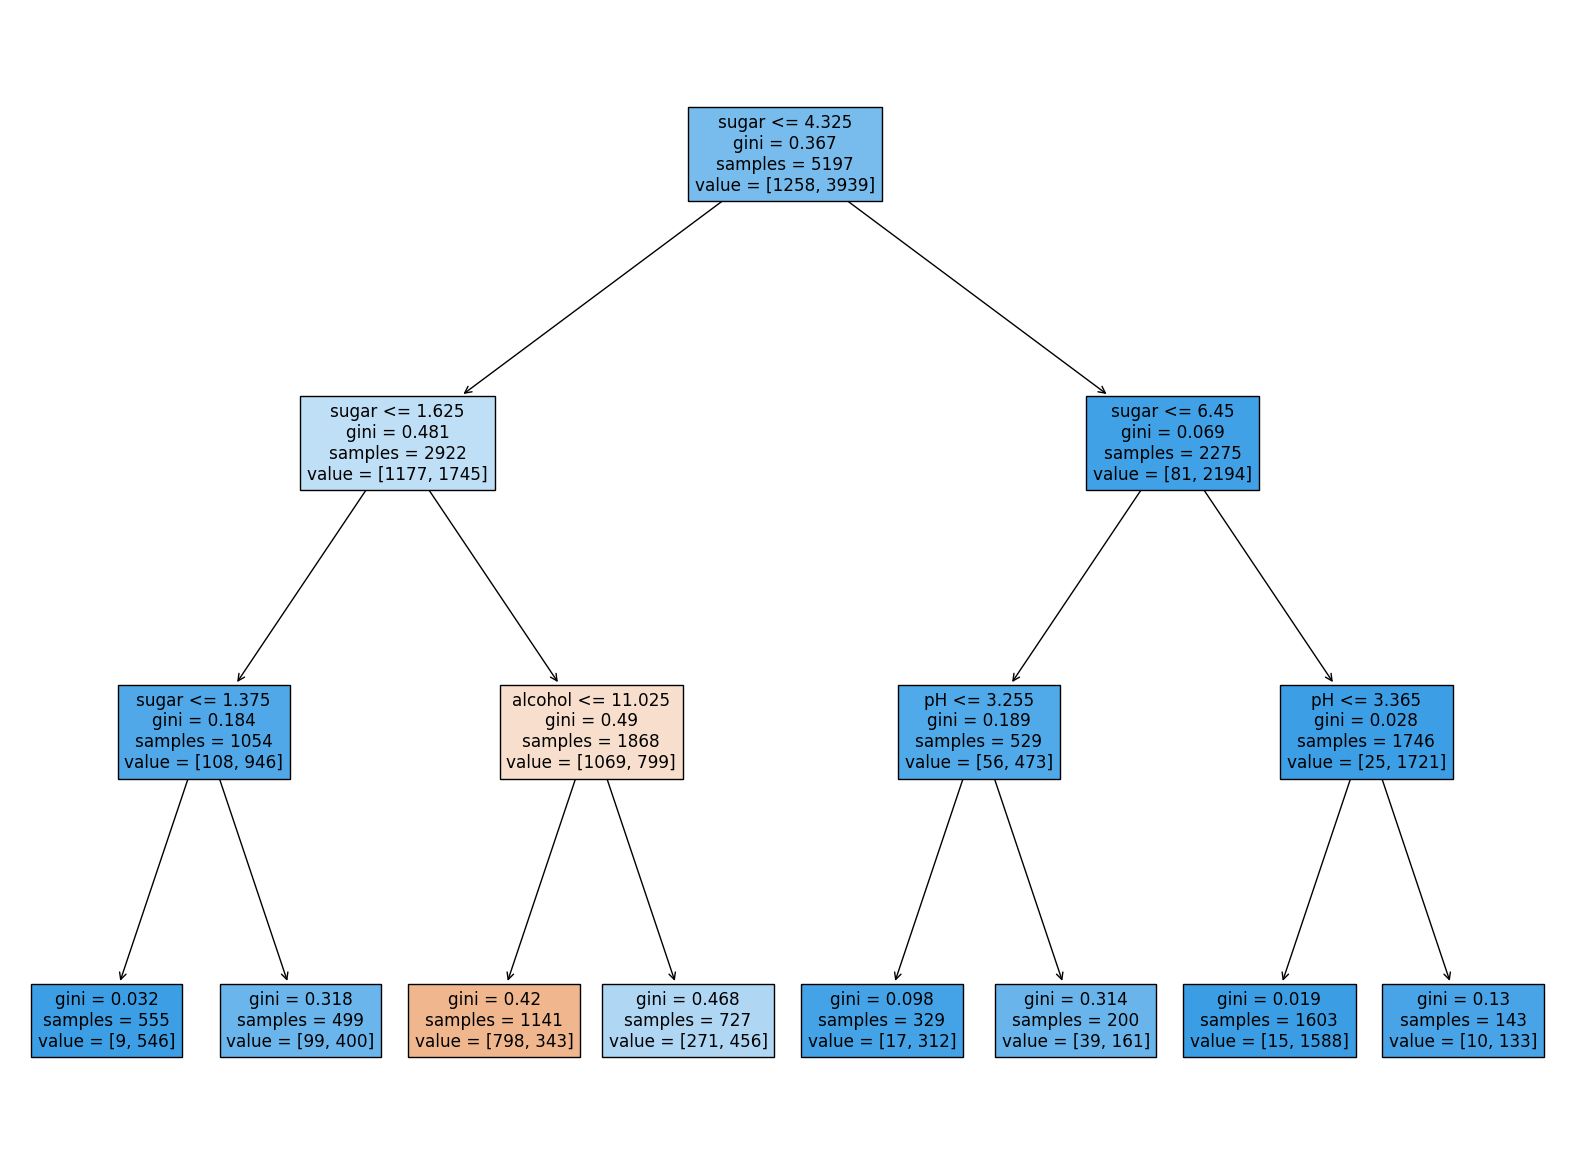

In [48]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

- 어떤 특성이 가장 유용한지 특성 중요도 계산
    - feature_importances_ 속성

In [49]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


- **결정트리는 약한 알고리즘으로 알려져 있다**
    - 성능이 안좋음
    - 단, 설명하기 좋은 알고리즘 임(일반적으로 모델 알고리즘은 블랙박스와 같아서 학습의 결과를 설명하기 어려움)